In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [21]:
def get_normalized_rates(df):
    norms = dfB.set_index(['subject', 'condition']).xs('baseline-light-period-nrem', level=1).rate_hz
    normed_rates = dfB.set_index(['subject', 'condition']).rate_hz / norms * 100
    normed_rates = normed_rates.rename('normalized_rate')
    return normed_rates.to_frame().reset_index()

In [30]:
dfA = pd.read_csv(Path('/home/gfindlay/Documents/ecephys_analyses/notebooks/SPWs/Analysis/generate-dataframes/total-spw-energy-3.csv'))
dfB = pd.read_csv(Path('/home/gfindlay/Documents/ecephys_analyses/notebooks/SPWs/Analysis/generate-dataframes/spw-incidence.csv'))
df = dfA.merge(dfB)
df = df.merge(get_normalized_rates(df))

In [31]:
df = df.pivot(index='subject', columns='condition')

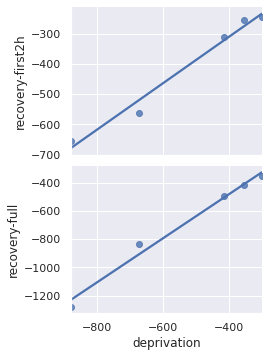

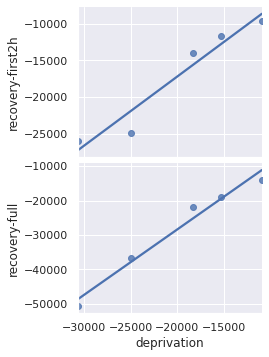

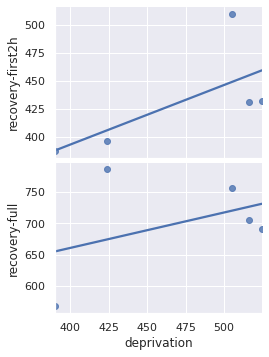

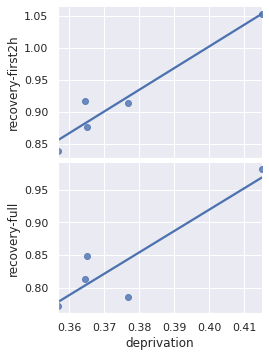

In [32]:
x_vars = ['deprivation']
y_vars = ['recovery-first2h', 'recovery-full']

g = sns.pairplot(df['amplitude'], diag_kind=None, kind='reg', plot_kws=dict(ci=None), x_vars=x_vars, y_vars=y_vars, aspect=1.5)
g = sns.pairplot(df['integral'], diag_kind=None, kind='reg', plot_kws=dict(ci=None), x_vars=x_vars, y_vars=y_vars, aspect=1.5)
g = sns.pairplot(df['duration'], diag_kind=None, kind='reg', plot_kws=dict(ci=None), x_vars=x_vars, y_vars=y_vars, aspect=1.5)
g = sns.pairplot(df['rate_hz'], diag_kind=None, kind='reg', plot_kws=dict(ci=None), x_vars=x_vars, y_vars=y_vars, aspect=1.5)

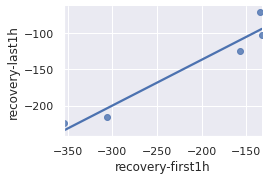

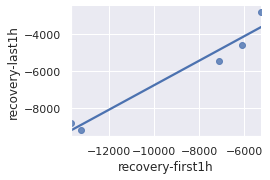

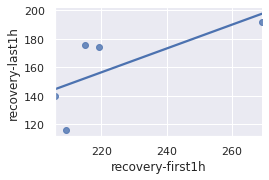

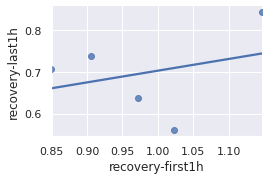

In [33]:
x_vars = ['recovery-first1h']
y_vars = ['recovery-last1h']

g = sns.pairplot(df['amplitude'], diag_kind=None, kind='reg', plot_kws=dict(ci=None), x_vars=x_vars, y_vars=y_vars, aspect=1.5)
g = sns.pairplot(df['integral'], diag_kind=None, kind='reg', plot_kws=dict(ci=None), x_vars=x_vars, y_vars=y_vars, aspect=1.5)
g = sns.pairplot(df['duration'], diag_kind=None, kind='reg', plot_kws=dict(ci=None), x_vars=x_vars, y_vars=y_vars, aspect=1.5)
g = sns.pairplot(df['rate_hz'], diag_kind=None, kind='reg', plot_kws=dict(ci=None), x_vars=x_vars, y_vars=y_vars, aspect=1.5)

[Text(0.5, 1.0, 'Pearson correlation coefficients'),
 Text(0.5, 12.5, ''),
 Text(30.499999999999993, 0.5, '')]

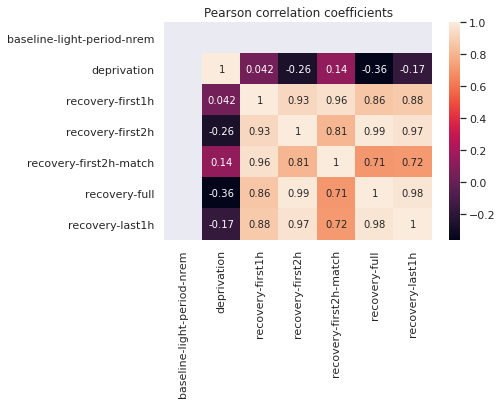

In [15]:
g = sns.heatmap(df['amplitude'].corr(method='pearson'), annot=True)
g.set_yticklabels(g.get_yticklabels(), rotation=0)
g.set(title='Pearson correlation coefficients', xlabel=None, ylabel=None)